081-Scikit-learn Introduction


Why Scikit-Learn?

- Built on NumPy and Matplotlib (and Python)
- Has many in-built machine learning models
- Methods to evaluate your machine learning models
- Very well-designed API


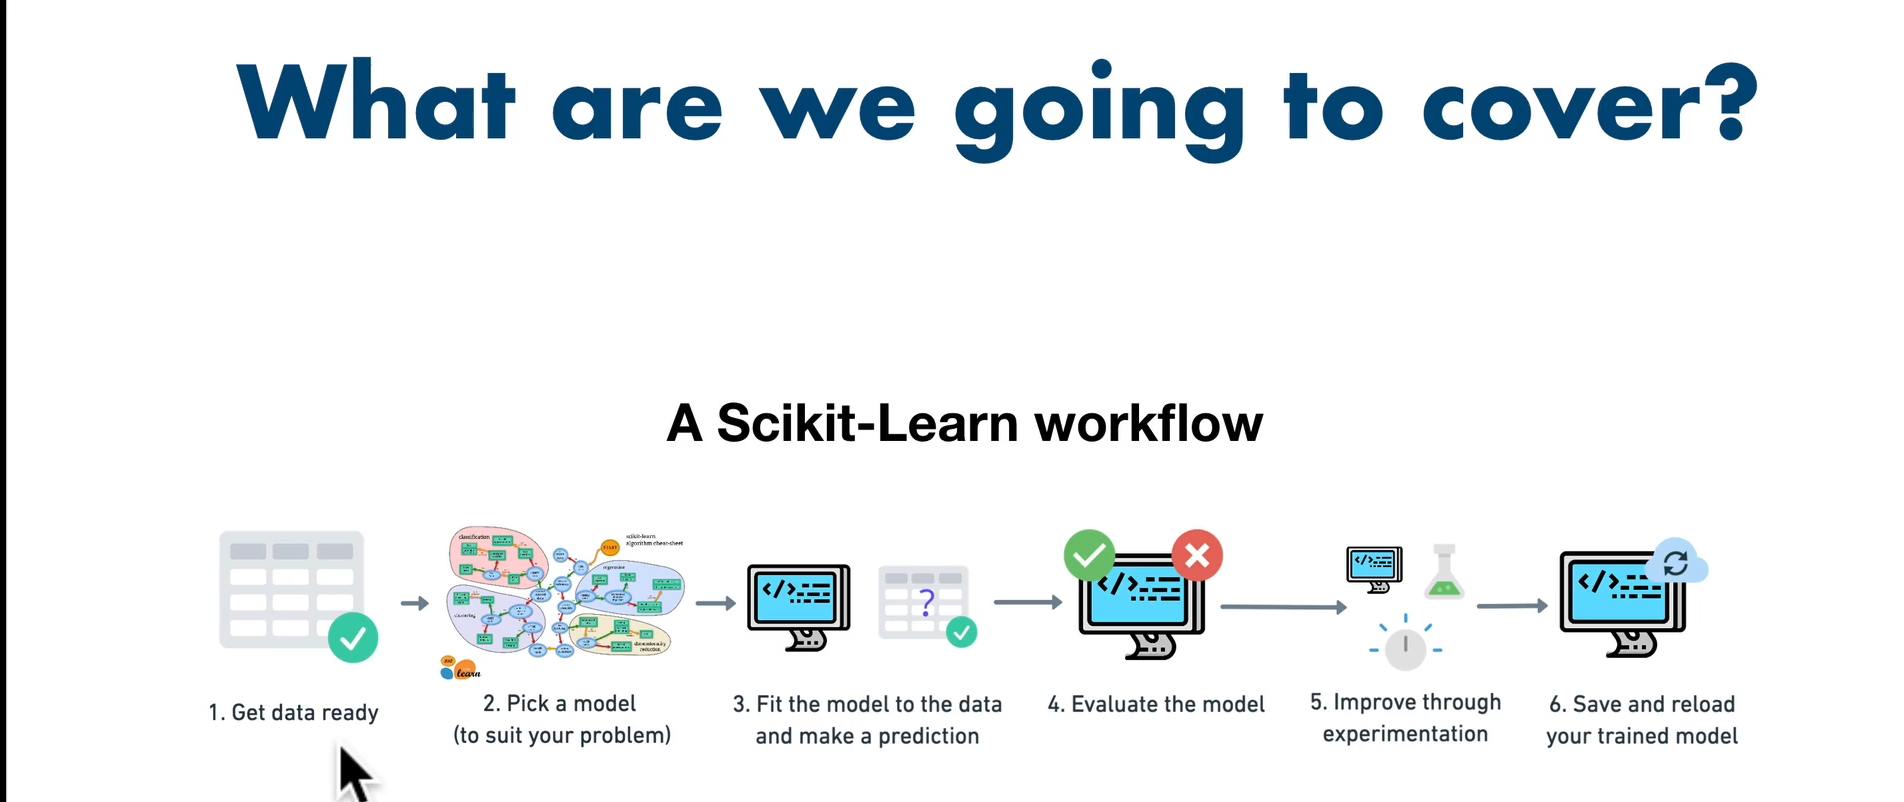


## What are we going to cover?

- An end-to-end Scikit-Learn workflow
- Getting data ready (to be used with machine learning models)
- Choosing a machine learning model
- Fitting a model to the data (learning patterns)
- Making predictions with a model (using patterns)
- Evaluating model predictions
- Improving model predictions
- Saving and loading models


082-Refresher - What Is Machine Learning


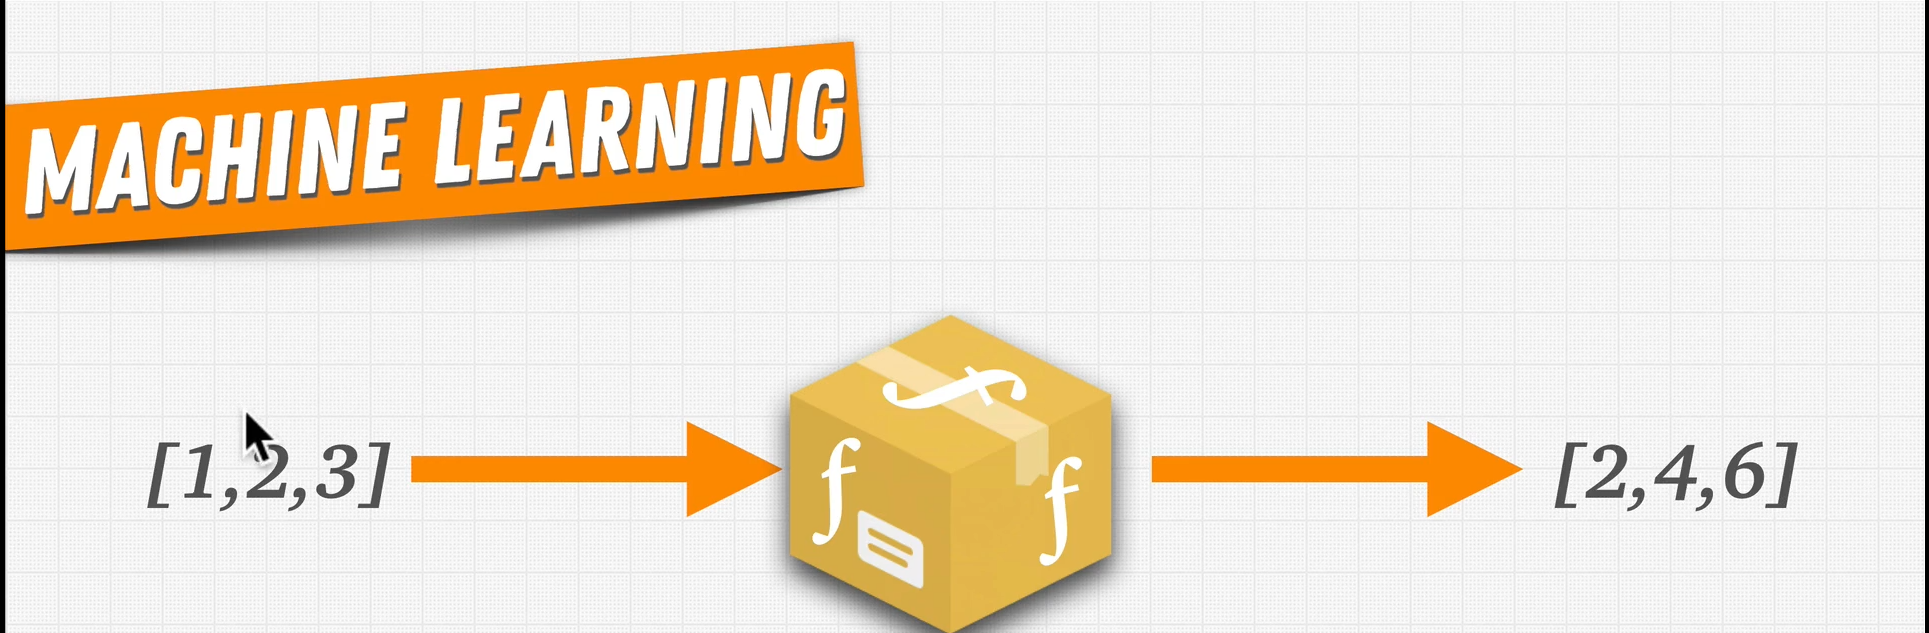


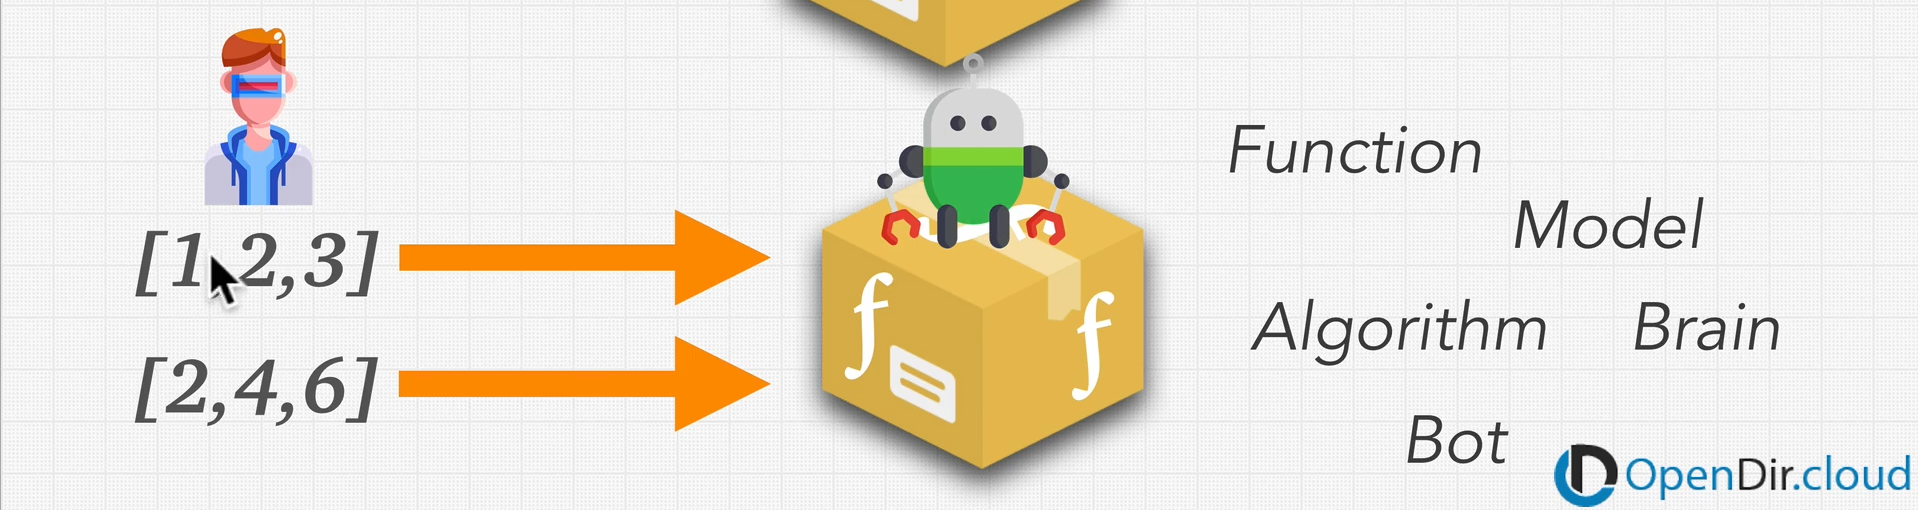


083-Scikit-learn Cheatsheet-


084-Typical scikit-learn Workflow-


# Intro to scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!


## 0. An end-to-end Scikit-Learn workflow


In [ ]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv(
    "S:/course/Complete-Machine-Learning-and-Data-Science/data/heart-disease.csv")

In [90]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [91]:
# Create y (labels)
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [92]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# make a pridiction
y_lable = clf.predict(np.array([0, 2, 3, 4]))

C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [96]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [97]:
y_test

147    1
248    0
215    0
226    0
206    0
      ..
260    0
135    1
205    0
237    0
164    1
Name: target, Length: 61, dtype: int64

In [ ]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [99]:
clf.score(X_test, y_test)

0.8360655737704918

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        34
           1       0.77      0.89      0.83        27

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [101]:
confusion_matrix(y_test, y_preds)

array([[27,  7],
       [ 3, 24]])

In [102]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [103]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100}")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.24590163934425

Trying model with 20 estimators...
Model accuracy on test set: 85.24590163934425

Trying model with 30 estimators...
Model accuracy on test set: 81.9672131147541

Trying model with 40 estimators...
Model accuracy on test set: 86.88524590163934

Trying model with 50 estimators...
Model accuracy on test set: 83.60655737704919

Trying model with 60 estimators...
Model accuracy on test set: 80.32786885245902

Trying model with 70 estimators...
Model accuracy on test set: 83.60655737704919

Trying model with 80 estimators...
Model accuracy on test set: 83.60655737704919

Trying model with 90 estimators...
Model accuracy on test set: 83.60655737704919



In [104]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [106]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

085-Optional - Debugging Warnings In Jupyter-
